In [47]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

In [22]:
rv = norm(loc=1, scale=0)

In [106]:
y = []
_x = np.linspace(-5, 5, 100)
for x in _x:
    y.append(norm.logcdf(x, loc=0, scale=1))

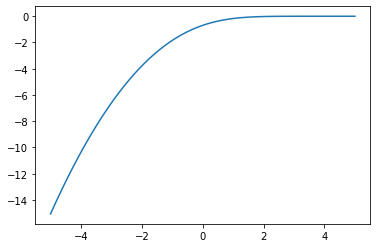

In [107]:
plt.plot(_x, y)

In [79]:
import math
x = np.array([1, 2])
sigma = np.identity(2)

a = np.array([12, 1])
b = np.array([2, 10])

d = a - b
print(x, d)

[1 2] [10 -9]


In [82]:
varAlongD = (d * sigma * d.T)[0]
print(np.sqrt(varAlongD))
meanAlongD = d.reshape(-1,).dot(x.reshape(-1,))
print(meanAlongD)
# norm.logcdf(meanAlongD, 0, np.sqrt(varAlongD))
np.log(norm.cdf(meanAlongD + 0.5, 0, np.sqrt(varAlongD)) - norm.cdf(meanAlongD - 0.5, 0, np.sqrt(varAlongD)))

[10.  0.]
-8


array([-3.54167366,         nan])

In [ ]:
norm.pdf()

In [112]:
norm(0, 1).rvs()

-0.894385450010955

# Log regression

In [56]:
import numpy as np
import src.bayes_logistic as bl

In [248]:
from random import randint

hidden_weights = np.array([0.3, 0.7])
utility = lambda x: hidden_weights[0] * x[0] + hidden_weights[1] * x[1] 

GAMMA_BST = 0.95
# All possible solutions for the Deep Sea Treaser
BST_SOLUTIONS = [
    [18 * GAMMA_BST**1, sum([-1 * GAMMA_BST**i for i in range(1)])],
    [26 * GAMMA_BST**2, sum([-1 * GAMMA_BST**i for i in range(2)])],
    [31 * GAMMA_BST**3, sum([-1 * GAMMA_BST**i for i in range(3)])],
    [44 * GAMMA_BST**6, sum([-1 * GAMMA_BST**i for i in range(6)])],
    [48.2 * GAMMA_BST**7, sum([-1 * GAMMA_BST**i for i in range(7)])],
    [56 * GAMMA_BST**9, sum([-1 * GAMMA_BST**i for i in range(9)])],
    [72 * GAMMA_BST**13, sum([-1 * GAMMA_BST**i for i in range(13)])],
    [76.3 * GAMMA_BST**14, sum([-1 * GAMMA_BST**i for i in range(14)])],
    [90 * GAMMA_BST**17, sum([-1 * GAMMA_BST**i for i in range(17)])],
    [100 * GAMMA_BST**19, sum([-1 * GAMMA_BST**i for i in range(19)])],
]


X = []
Y = []

w_prior = np.ones(len(hidden_weights)) / len(hidden_weights)

n_iter = 10
for ii in range(n_iter):
    # Get two returns randomly
    p1 = np.array(random.choice(BST_SOLUTIONS))
    p2 = np.array(random.choice(BST_SOLUTIONS))
    # Dont chose p1 = p2
    while list(p2) == list(p1):
        p2 = np.array(random.choice(BST_SOLUTIONS))
            
    # Add the difference to the dataset as x
    x = p1 - p2
    X.append(x)
    # Add the preference of the user to the dataset as y
    Y.append(int(utility(p1) >= utility(p2)))
    
    # Regression
    H_prior_diag = np.ones(len(hidden_weights)) * (1.0 / 0.33) ** 2

    w_fit, H_fit = bl.fit_bayes_logistic(np.array(Y),
                                         np.array(X),
                                         w_prior,
                                         H_prior_diag)
    cov_mat = np.linalg.inv(np.diag(H_fit))
    z = np.random.multivariate_normal(mean=w_fit / sum(w_fit), cov=cov_mat, size=1)
    y = np.transpose(z)
    if ii == n_iter - 1 or ii== 0:
        sns.jointplot(x=y[0],
                      y=y[1], 
                      kind="kde", 
                      space=0);
unnorm_w = w_fit
sum_w = sum(unnorm_w)
norm_w = unnorm_w / sum_w
print("Initial covariance: \n", np.linalg.inv(np.diag(H_prior_diag)))
print("Posterior covariance: \n", np.linalg.inv(np.diag(H_fit)))
print("Mean weight estimate: ", norm_w)


NameError: name 'random' is not defined

In [110]:
sum([-0.90422527, 0.87786113 , 1.02636414])

1.0

In [151]:
w_prior = np.ones(len(hidden_weights)) / \
    len(hidden_weights)
H_prior_diag = np.ones(
    len(hidden_weights)) * (1.0 / 0.33) ** 2

print(w_prior)
w_fit, H_fit = bl.fit_bayes_logistic(Y,
                                     X,
                                     w_prior,
                                     H_prior_diag)
unnorm_w = w_fit
sum_w = sum(unnorm_w)
print(unnorm_w / sum_w)


[0.5 0.5]
[0.50054316 0.49945684]


In [92]:
import numpy as np
GAMMA_BST = 0.95


BST_SOLUTIONS = [
    [18 * GAMMA_BST**1, sum([-1 * GAMMA_BST**i for i in range(1)])],
    [26 * GAMMA_BST**2, sum([-1 * GAMMA_BST**i for i in range(2)])],
    [31 * GAMMA_BST**3, sum([-1 * GAMMA_BST**i for i in range(3)])],
    [44 * GAMMA_BST**6, sum([-1 * GAMMA_BST**i for i in range(6)])],
    [48.2 * GAMMA_BST**7, sum([-1 * GAMMA_BST**i for i in range(7)])],
    [56 * GAMMA_BST**9, sum([-1 * GAMMA_BST**i for i in range(9)])],
    [72 * GAMMA_BST**13, sum([-1 * GAMMA_BST**i for i in range(13)])],
    [76.3 * GAMMA_BST**14, sum([-1 * GAMMA_BST**i for i in range(14)])],
    [90 * GAMMA_BST**17, sum([-1 * GAMMA_BST**i for i in range(17)])],
    [100 * GAMMA_BST**19, sum([-1 * GAMMA_BST**i for i in range(19)])],
]

# weights = [0.43418691, 0.56581309]
weights = [0.36666223, 0.63333777]

def get_best_sol(weights):
    utility = lambda x: weights[0] * x[0] + weights[1] * x[1]

    best_u = -1000
    best_sol = 0

    for sol in BST_SOLUTIONS:
        if utility(sol) > best_u:
            best_u = utility(sol)
            best_sol = sol

    return best_sol

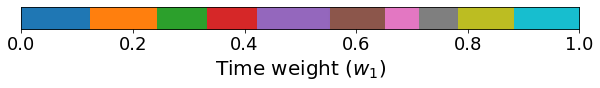

In [111]:
import matplotlib.pyplot as plt

colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:brown", "tab:pink", "tab:gray", "tab:olive", "tab:cyan"]

trace = [0.1, 0.2, 0.3]

optimal_weights = np.array([1, 0.])

num_iter = 9
y = np.arange(0, num_iter + 1, 0.01)

weights_line = np.arange(0, 1.01, 0.01)

figure, ax = plt.subplots(figsize=(10, 0.4))

for i, sol in enumerate(BST_SOLUTIONS):

    for time_weight in weights_line:
        full_weight = [1-time_weight, time_weight]
        if get_best_sol(full_weight) == sol:
            plt.scatter(x=[time_weight]*len(y), y=y, c=colors[::-1][i], s=120)

            

plt.xlim(xmin = 0, xmax=1)
plt.ylim(ymin = 0, ymax=1)
plt.yticks([])
plt.xticks(fontsize=18)
plt.xlabel("Time weight ($w_1$)", fontsize=20)
# plt.ylabel("iteration")

# plt.plot(trace, list(range(len(trace))), marker='o', color="black")

# figure.tight_layout()
# figure.subplots_adjust(bottom=0.16)  
# figure.legend(loc='lower center', frameon=True, fontsize=11, ncol=5)
plt.savefig("figures/OLS_DST_BAR", bbox_inches='tight')
    
    
    

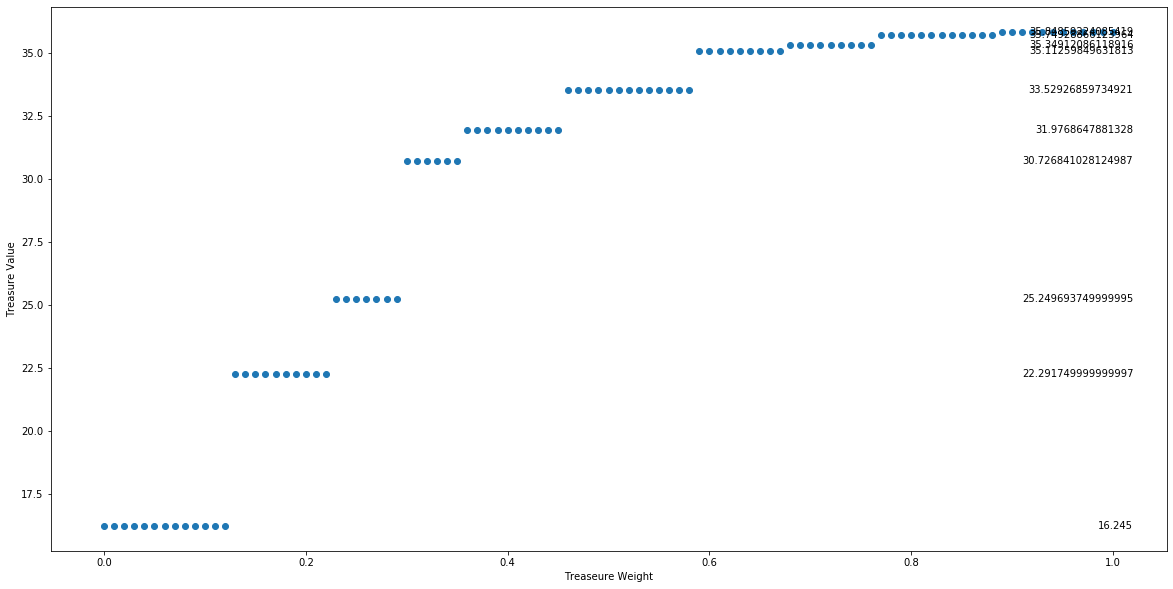

In [6]:
import matplotlib.pyplot as plt

y = []
u = []
weights_line = np.arange(0, 1.01, 0.01)

for w in weights_line:
    val = get_best_sol([w, 1-w])
    u.append(w * val[0] + (1-w) * val[1])
    y.append(val[0])
#     print(w, val)

plt.figure(figsize=(20, 10))
plt.scatter(x=weights_line, y=y)
plt.xlabel("Treaseure Weight")
plt.ylabel("Treasure Value")

for sol in solutions:
#     plt.hlines(sol[0], 0, 1, linestyles='dashed')
    plt.text(1.02, sol[0], sol[0], ha='right', va='center')

In [7]:
unique_y = set(y)
unique_y

{16.245,
 22.291749999999997,
 25.249693749999995,
 30.726841028124987,
 31.9768647881328,
 33.52926859734921,
 35.11259849631813,
 35.34912086118916,
 35.74928866123964,
 35.84859224085419}

In [8]:
len(unique_y)

10

In [9]:
print(u[-10:])
print(weights_line[-10:])

[31.467493599512693, 31.954282337439526, 32.44107107536636, 32.92785981329319, 33.41464855122002, 33.901437289146855, 34.388226027073685, 34.87501476500052, 35.36180350292736, 35.84859224085419]
[0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98 0.99 1.  ]


In [33]:
hidden_weights = [1, 0.0]

utility = lambda x: hidden_weights[0] * x[0] + hidden_weights[1] * x[1]

max_u = utility(get_best_sol(hidden_weights))
print(max_u)

35.84859224085419


In [36]:
utilities = []
norm_utilities = []
for sol in solutions:
    utilities.append(utility(sol))
print(utilities)
print()
for u in utilities:
    norm_utilities.append((u - min(utilities)) / (max(utilities) - min(utilities)))

print(norm_utilities)

[16.245, 22.291749999999997, 25.249693749999995, 30.726841028124987, 31.9768647881328, 33.52926859734921, 35.11259849631813, 35.34912086118916, 35.74928866123964, 35.84859224085419]

[0.0, 0.308451120881737, 0.4593389639697807, 0.7387340468113087, 0.8024990825583156, 0.8816888448295984, 0.9624561796892389, 0.9745214359935458, 0.9949344192434487, 1.0]


In [364]:
w_list = np.arange(0, 1, 0.01)
u_list = []
for w in w_list:
    sol = get_best_sol([w, 1-w])
    u_list.append(utility(sol) / max_u)
    
    

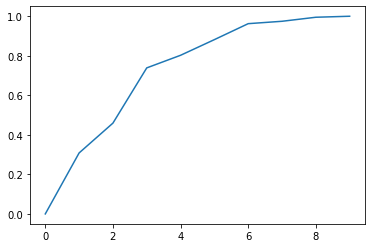

In [32]:
plt.plot(norm_utilities);


In [ ]:
17.1 * 1 +  0.

In [2]:
from collections import namedtuple

Point = namedtuple("Point", ["x", "y"])

def intersection(p1, p2, p3, p4):
    """
    Compute the intersection of the lines defined as
    (p1, p2) and (p3, p4)
    """
    # print(p1, p2, p3, p4)
    numX = (p1.x*p2.y-p1.y*p2.x)*(p3.x-p4.x)-(p1.x-p2.x)*(p3.x*p4.y-p3.y*p4.x)
    numY = (p1.x*p2.y-p1.y*p2.x)*(p3.y-p4.y)-(p1.y-p2.y)*(p3.x*p4.y-p3.y*p4.x)
    denum = (p1.x-p2.x)*(p3.y-p4.y)-(p1.y-p2.y)*(p3.x-p4.x)

    px = numX / denum
    py = numY / denum
    # return Point(round(px, 4), round(py, 4))
    return px, py

In [3]:
intersection(Point(0.1, 0), Point(0.1, 3), Point(0, 4), Point(1, 2))

(0.10000000000000002, 3.8000000000000003)

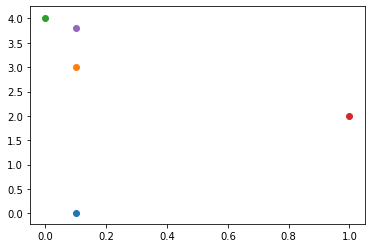

In [7]:
import matplotlib.pyplot as plt
plt.scatter(0.1, 0)
plt.scatter(0.1, 3)
plt.scatter(0, 4)
plt.scatter(1, 2)
plt.scatter(0.1, 3.8)

In [65]:
import numpy as np

def sample_point_on_sphere(npoints, ndim=3):
    vec = np.random.randn(ndim)
    vec /= np.linalg.norm(vec, axis=0)
    while not (not False in np.all(vec>0, axis=0)):
        vec = np.random.randn(ndim)
        vec /= np.linalg.norm(vec, axis=0)
    return vec

def sample_spherical(npoints, ndim=3):
    vec = np.random.randn(ndim, npoints)
    vec /= np.linalg.norm(vec, axis=0)
    while not (not False in np.all(vec>0, axis=0)):
        vec = np.random.randn(ndim, npoints)
        vec /= np.linalg.norm(vec, axis=0)
    return vec

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d

phi = np.linspace(0, np.pi, 20)
theta = np.linspace(0, 2 * np.pi, 40)
x = np.outer(np.sin(theta), np.cos(phi))
y = np.outer(np.sin(theta), np.sin(phi))
z = np.outer(np.cos(theta), np.ones_like(phi))

xi, yi, zi = sample_spherical(300)

fig, ax = plt.subplots(1, 1, subplot_kw={'projection':'3d'})
# ax.plot_wireframe(x, y, z, color='k', rstride=1, cstride=1)
ax.scatter(xi, yi, zi, s=100, c='r', zorder=10)

# print(xi, yi, zi)

KeyboardInterrupt: 

In [61]:
import numpy as np
arr = np.array([[0.8, 0.9, 0.2], [0.1, 0.6, 0.1], [0.2, 0.3, 0.4]])
print(arr)
print(np.all(arr>0, axis=0))

[[0.8 0.9 0.2]
 [0.1 0.6 0.1]
 [0.2 0.3 0.4]]
[ True  True  True]


In [32]:
def sample_point_on_positive_sphere(pos = False):
    ndim = 3
    vec = np.random.randn(ndim)
    vec /= np.linalg.norm(vec, axis=0)
    if pos:
        while not (vec>0).all():
            vec = np.random.randn(ndim)
            vec /= np.linalg.norm(vec, axis=0)
    else:
        while (vec>0).all():
            vec = np.random.randn(ndim)
            vec /= np.linalg.norm(vec, axis=0)
    return vec

In [9]:
def create_3D_pareto_front(plot=False):
    pareto_front = []
    xs = []
    ys = []
    zs = []
    
    pxs = []
    pys = []
    pzs = [] 

    for _ in range(1000):
        x, y, z = sample_point_on_positive_sphere(pos=True)
        pareto_front.append([x, y, z])
        pxs.append(x)
        pys.append(y)
        pzs.append(z)
        
#     if plot:
#         fig, ax = plt.subplots(1, 1, subplot_kw={'projection':'3d'})
        
#         ax.scatter(pxs, pys, pzs, s=100, c='r', zorder=10)
        
#         fig.show()
    
#     return pareto_front

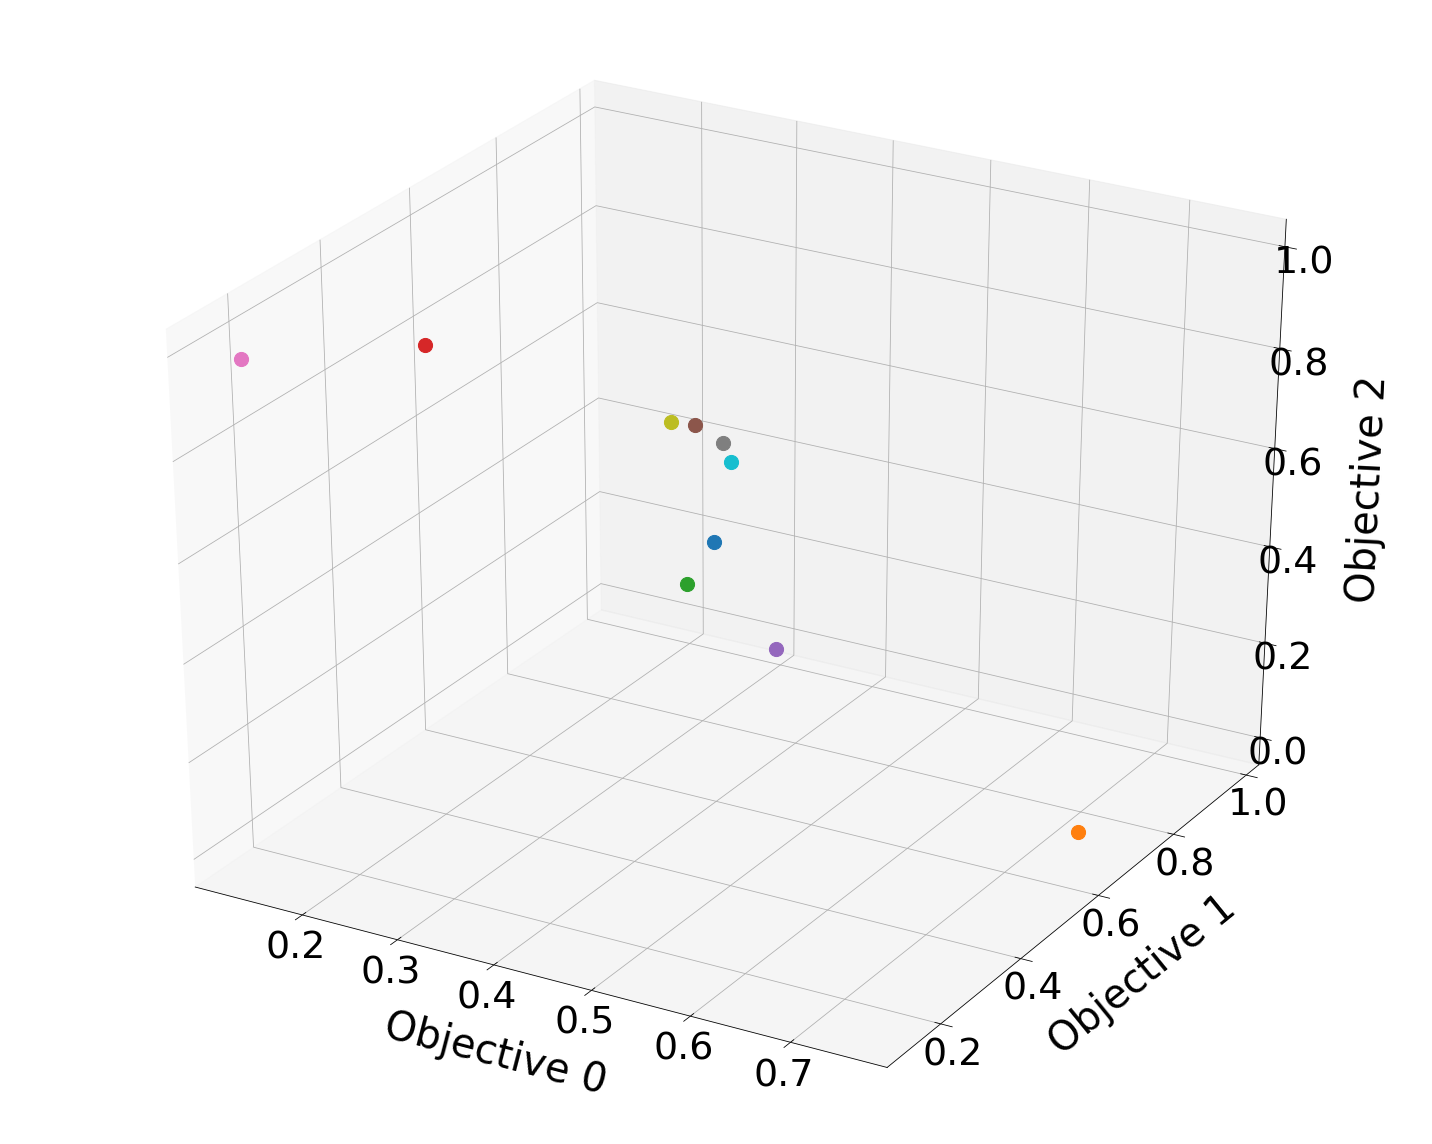

In [62]:
from src.ols.utils import create_3D_pareto_front
import matplotlib.pyplot as plt

def plot_3D_pareto_front(pareto_front):
    xs = []
    ys = []
    zs = []
    for x, y, z in pareto_front:
        xs.append(x)
        ys.append(y)
        zs.append(z)
    fig, ax = plt.subplots(1, 1, subplot_kw={'projection':'3d'}, figsize=(20,16))
    for i in range(len(xs)):
        ax.scatter(xs[i], ys[i], zs[i], s=200)
    ax.set_xlabel("Objective 0" , fontsize=40)
    ax.set_ylabel("Objective 1", fontsize=40)
    ax.set_zlabel("Objective 2", fontsize=40)
    ax.xaxis.set_tick_params(labelsize=38)
    ax.yaxis.set_tick_params(labelsize=38)
    ax.zaxis.set_tick_params(labelsize=38)
    ax.xaxis.labelpad=40
    ax.yaxis.labelpad=40
    ax.zaxis.labelpad=40
    


    
#     ax.view_init(elev=15., azim=0)
#     plt.show()
    plt.tight_layout()
    plt.savefig("figures/3D_PF.png")

pf = create_3D_pareto_front()
plot_3D_pareto_front(pf)


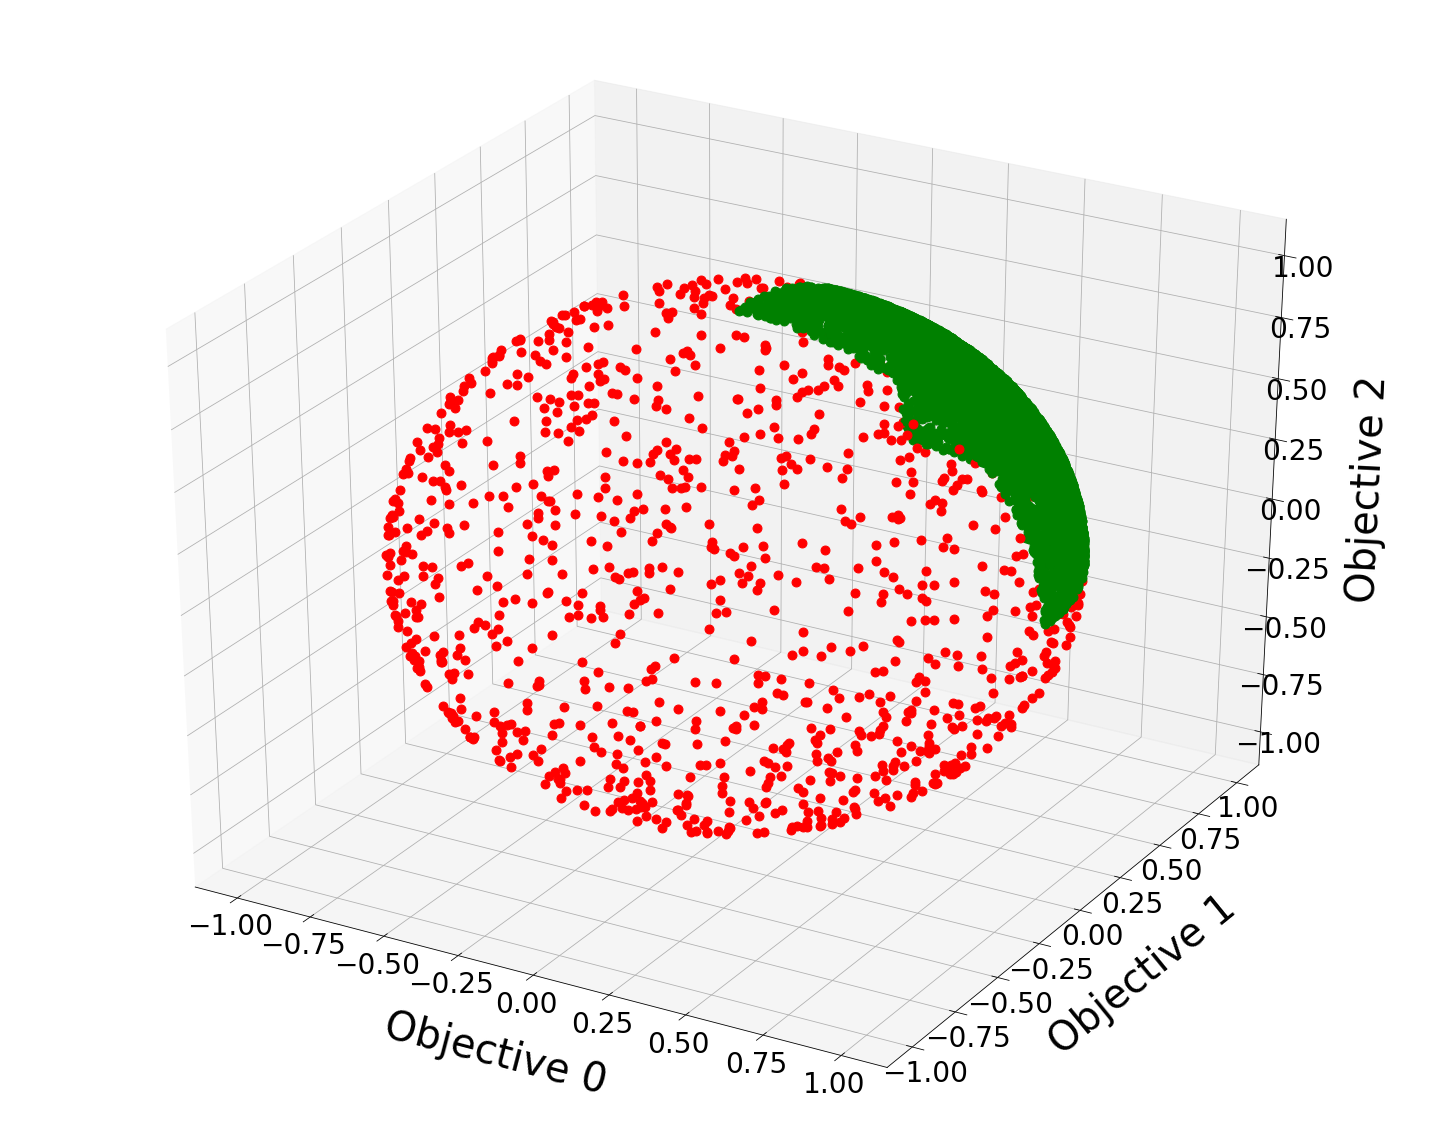

In [65]:
import plotly.graph_objs as go
from plotly.offline import *
import numpy as np

fig, ax = plt.subplots(1, 1, subplot_kw={'projection':'3d'}, figsize=(20,16))
ax.set_xlabel("Objective 0" , fontsize=40)
ax.set_ylabel("Objective 1", fontsize=40)
ax.set_zlabel("Objective 2", fontsize=40)
ax.xaxis.set_tick_params(labelsize=28)
ax.yaxis.set_tick_params(labelsize=28)
ax.zaxis.set_tick_params(labelsize=28)
ax.xaxis.labelpad=40
ax.yaxis.labelpad=40
ax.zaxis.labelpad=40

xs = []
ys = []
zs = [] 

for _ in range(1000):
    x, y, z = sample_point_on_positive_sphere(pos=False)
    xs.append(x)
    ys.append(y)
    zs.append(z)
    
for i in range(len(xs)):
    ax.scatter(xs[i], ys[i], zs[i], s=80, color="red")
# trace_red = go.Scatter3d(
# x = pxs, y = pys, z = pzs,mode = 'markers', marker = dict(
#   size = 12,
#   color = z, # set color to an array/list of desired values
  
#   ), marker_color = "red")

xs = []
ys = []
zs = [] 

for _ in range(5000):
    x, y, z = sample_point_on_positive_sphere(pos=True)
    xs.append(x)
    ys.append(y)
    zs.append(z)
for i in range(len(xs)):
    ax.scatter(xs[i], ys[i], zs[i], s=80, color="green")

# trace_green = go.Scatter3d(
#    x = pxs, y = pys, z = pzs,mode = 'markers', marker = dict(
#       size = 12,
#       color = z, # set color to an array/list of desired values
      
#       ), marker_color = "green"
#    )
# layout = go.Layout(title = '3D Scatter plot', scene=go.Scene(
#         xaxis=go.XAxis(title='objective 0'),
#         yaxis=go.YAxis(title='objective 1'),
#         zaxis=go.ZAxis(title='objective 2')
#     ))
# fig = go.Figure(data = [trace_green, trace_red], layout = layout)
# plot(fig)
# plt.title("Unit Sphere whith sampling area in green", fontsize=22)
# plt.show()
plt.tight_layout()
plt.savefig("figures/sphere")

In [104]:
np.inf > 3

True

In [4]:
np.arange(0, 1, 10)

array([0])

In [66]:
x = "0.4_0.2_0.4"
w = np.array([float(w) for w in x.split('_')])

In [67]:
d = {w: "a"}

TypeError: unhashable type: 'numpy.ndarray'

In [9]:
import pickle 
from recordclass import recordclass


CornerWeight = recordclass("CornerWeight", ["w0", "w1", "improvement"])


run = "6"
S = pickle.load(open(f'runs_ols/minecart_run_{run}/S.pkl', 'rb'))
W = pickle.load(open(f'runs_ols/minecart_run_{run}/W.pkl', 'rb'))
Q = pickle.load(open(f'runs_ols/minecart_run_{run}/Q.pkl', 'rb'))

In [10]:
print(W)
print()
print(S)
print()
print(Q)

[[0.0, 0.0, 1.0], [0.0, 1.0, 0.0], [1.0, 0.0, 0.0], [0.35, 0.08, 0.5700000000000001]]

[[0.0, 0.0, -0.9999999983836795], [0.0, 1.1078536539681056, -1.1624848682306381], [0.9813837184799885, 0.0, -1.6149841567379077], [0.0, 0.0, -0.44395795400206406]]

[(-0.6649105413092673, CornerWeight(w0=0.42, w1=0.23, improvement=0.6649105413092673))]


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # <--- This is important for 3d plotting 

S = np.array(S)
S

array([[ 0.  ,  0.  , -1.  ],
       [ 0.  ,  1.04, -1.24],
       [ 0.85,  0.  , -1.5 ]])

In [7]:
X = S[:, 0]
Y = S[:, 1]
Z = S[:, 2]

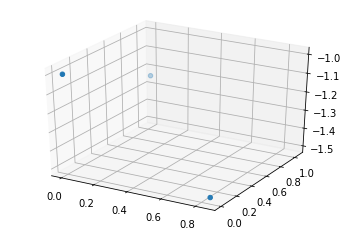

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs=X, ys=Y, zs=Z)

In [94]:
print(S)

[[ 0.          0.         -1.        ]
 [ 0.          0.7103233  -3.4859907 ]
 [ 0.80186195  0.         -2.60505343]]


In [96]:
GAMMA_BST = 0.95
[18 * GAMMA_BST**1, sum([-1 * GAMMA_BST**i for i in range(1)])]

[17.099999999999998, -1.0]

In [97]:
[100 * GAMMA_BST**19, sum([-1 * GAMMA_BST**i for i in range(19)])]

[37.73536025353073, -12.452927949293844]

ModuleNotFoundError: No module named 'pyqt5'

In [18]:
from src.ols.utils import create_3D_pareto_front
from src.utils import get_best_sol, get_best_sol_BST
import random
import numpy as np

SCALE = 100

In [13]:
def random_points(num_points=25):
    points = []
    for i in range(num_points):
        x = random.randint(1, SCALE)
        y = random.randint(0, SCALE - x)
        z = SCALE - x - y
        points.append((x,y,z))
    return np.array(points) / 100

random_weights = random_points(200)
pf = create_3D_pareto_front(size=10)

for sol in pf:
    for w in random_weights:
        if get_best_sol(pf, w) == sol:
            print(list(w))
            break

[0.05, 0.77, 0.18]
[0.8, 0.06, 0.14]
[0.07, 0.77, 0.16]
[0.11, 0.32, 0.57]
[0.34, 0.64, 0.02]
[0.21, 0.4, 0.39]
[0.08, 0.04, 0.88]
[0.32, 0.4, 0.28]
[0.18, 0.44, 0.38]
[0.64, 0.05, 0.31]


In [22]:
def random_points(num_points=25):
    points = []
    for i in range(num_points):
        x = random.randint(1, SCALE)
        y = 100 -x
        points.append((x,y))
    return np.array(points) / 100

GAMMA_BST = 0.95
BST_SOLUTIONS = [
    [18 * GAMMA_BST**1, sum([-1 * GAMMA_BST**i for i in range(1)])],
    [26 * GAMMA_BST**2, sum([-1 * GAMMA_BST**i for i in range(2)])],
    [31 * GAMMA_BST**3, sum([-1 * GAMMA_BST**i for i in range(3)])],
    [44 * GAMMA_BST**6, sum([-1 * GAMMA_BST**i for i in range(6)])],
    [48.2 * GAMMA_BST**7, sum([-1 * GAMMA_BST**i for i in range(7)])],
    [56 * GAMMA_BST**9, sum([-1 * GAMMA_BST**i for i in range(9)])],
    [72 * GAMMA_BST**13, sum([-1 * GAMMA_BST**i for i in range(13)])],
    [76.3 * GAMMA_BST**14, sum([-1 * GAMMA_BST**i for i in range(14)])],
    [90 * GAMMA_BST**17, sum([-1 * GAMMA_BST**i for i in range(17)])],
    [100 * GAMMA_BST**19, sum([-1 * GAMMA_BST**i for i in range(19)])],
]
random_weights = random_points(200)
for sol in BST_SOLUTIONS:
    for w in random_weights:
        if get_best_sol_BST(w) == sol:
            print(list(w))
            break

[0.03, 0.97]
[0.22, 0.78]
[0.23, 0.77]
[0.32, 0.68]
[0.36, 0.64]
[0.49, 0.51]
[0.64, 0.36]
[0.74, 0.26]
[0.8, 0.2]
[0.99, 0.01]


In [12]:
## Generate Data
import random
import numpy as np

SCALE = 100


def random_points(num_points=25):
    points = []
    for i in range(num_points):
        x = random.randint(1, SCALE)
        y = random.randint(0, SCALE - x)
        z = SCALE - x - y
        points.append((x,y,z))
    return points

points = random_points(1000)
weights = np.array(points)
print(weights / 100)

for w in weights:
    best_sol_for_w = get


# Scatter Plot
# figure, tax = ternary.figure(scale=SCALE)
# figure.set_size_inches(10, 10)
# # Plot a few different styles with a legend
# tax.scatter(points, color='red', label="V1")
# tax.legend()

# tax.set_title("CCS", fontsize=20)
# tax.boundary(linewidth=2.0)
# tax.gridlines(multiple=5, color="blue")
# tax.ticks(axis='lbr', linewidth=1, multiple=5)
# tax.clear_matplotlib_ticks()
# tax.get_axes().axis('off')

# tax.show()

[[0.86 0.14 0.  ]
 [0.14 0.02 0.84]
 [0.28 0.33 0.39]
 ...
 [0.92 0.02 0.06]
 [0.99 0.01 0.  ]
 [0.82 0.01 0.17]]


In [57]:
num_obj = 3

initial_one_pos = np.random.randint(0, num_obj)
weights = np.array([0 if pos is not initial_one_pos else 1 for pos in range(num_obj)])

print(initial_one_pos)
print(weights)

0
[1 0 0]


In [59]:
a = "1_2_2_3"

In [60]:
a.split("_")[:-1]

['1', '2', '2']

In [64]:
(3 + 2 + 1) * (5 + 6 + 7)

108

In [65]:
3 * 5 + 2 * 6 + 1 * 7

34

In [68]:
np.round(3.222, 2)

3.22

In [82]:
initial_weights = []
num_obj = 5
for i in range(num_obj):
    initial_weights.append(np.array([1 if pos == i else 0 for pos in range(num_obj)]))

In [83]:
initial_weights

[array([1, 0, 0, 0, 0]),
 array([0, 1, 0, 0, 0]),
 array([0, 0, 1, 0, 0]),
 array([0, 0, 0, 1, 0]),
 array([0, 0, 0, 0, 1])]

In [84]:
list(np.array([0, 1]))

[0, 1]

In [89]:
np.setdiff1d(intial_weights, (np.array([0, 0, 0, 0, 1])))

array([], dtype=float64)

In [4]:
most_simiar_weights = [1.00, 1.0]
weights = [1, 1]
list(most_simiar_weights) == list(weights)

True

In [5]:
x = {[1, 2]: 3}

TypeError: unhashable type: 'list'

No handles with labels found to put in legend.


[[26.0, 60.0, 14.000000000000002], [1.0, 68.0, 31.0], [27.0, 60.0, 13.0], [28.999999999999996, 53.0, 18.0], [15.0, 60.0, 25.0], [30.0, 56.00000000000001, 14.000000000000002], [26.0, 63.0, 11.0]]
[[60.0, 15.0, 25.0], [55.00000000000001, 24.0, 21.0], [84.0, 6.0, 10.0], [97.0, 0.0, 3.0], [62.0, 36.0, 2.0], [43.0, 38.0, 19.0], [40.0, 44.0, 16.0], [38.0, 50.0, 12.0], [100.0, 0.0, 0.0], [59.0, 37.0, 4.0], [100.0, 0.0, 0.0], [76.0, 3.0, 21.0], [57.99999999999999, 16.0, 26.0], [99.0, 0.0, 1.0], [91.0, 6.0, 3.0], [51.0, 47.0, 2.0], [69.0, 28.000000000000004, 3.0], [90.0, 8.0, 2.0], [86.0, 9.0, 5.0], [49.0, 34.0, 17.0], [48.0, 30.0, 22.0], [82.0, 12.0, 6.0], [93.0, 7.000000000000001, 0.0], [83.0, 5.0, 12.0], [82.0, 15.0, 3.0], [76.0, 11.0, 13.0], [83.0, 5.0, 12.0], [76.0, 18.0, 6.0], [90.0, 5.0, 5.0], [89.0, 7.000000000000001, 4.0], [100.0, 0.0, 0.0], [61.0, 32.0, 7.000000000000001], [51.0, 34.0, 15.0], [95.0, 0.0, 5.0], [52.0, 46.0, 2.0], [71.0, 11.0, 18.0], [90.0, 7.000000000000001, 3.0], [94.

/home/benjamin/.local/lib/python3.6/site-packages/ternary/plotting.py:46: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks([], [])
/home/benjamin/.local/lib/python3.6/site-packages/ternary/plotting.py:48: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_yticks([], [])


(-5.0, 105.0, -10.0, 90.0)

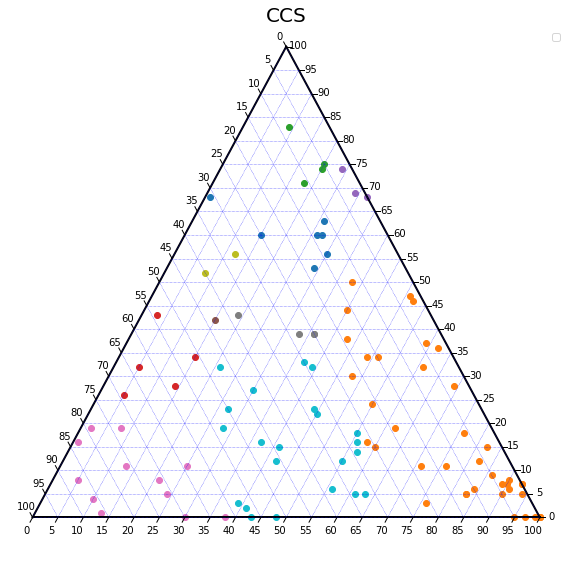

In [24]:
from src.ols.utils import create_3D_pareto_front
from src.utils import get_best_sol
import ternary
import pickle
import random
import numpy as np

pf = create_3D_pareto_front(size=10)


SCALE = 100


def random_points(num_points=25):
    points = []
    for i in range(num_points):
        x = random.randint(1, SCALE)
        y = random.randint(0, SCALE - x)
        z = SCALE - x - y
        points.append((x,y,z))
    return points

# Get 100_000
points = random_points(100)
weights = np.array(points)
weights = weights / 100
# weigts = np.array([[0.1, 0.2, 0.3]])

# Scatter Plot
figure, tax = ternary.figure(scale=SCALE)
figure.set_size_inches(10, 10)

saved_pf = {}

for i, sol in enumerate(pf):
    points_to_draw = []

    for w in weights:
        best_sol_for_w = get_best_sol(pf, w)
        if best_sol_for_w == sol:
            points_to_draw.append(list(w * 100))
    print(points_to_draw)
    tax.scatter(points_to_draw)
    saved_pf[i] = points_to_draw

tax.legend()
tax.set_title("CCS", fontsize=20)
tax.boundary(linewidth=2.0)
tax.gridlines(multiple=5, color="blue")
tax.ticks(axis='lbr', linewidth=1, multiple=5)
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')

/home/benjamin/.local/lib/python3.6/site-packages/IPython/core/pylabtools.py:128: UserWarning: 'frac' option in 'arrowprops' is no longer supported; use 'headlength' to set the head length in points.
  fig.canvas.print_figure(bytes_io, **kw)


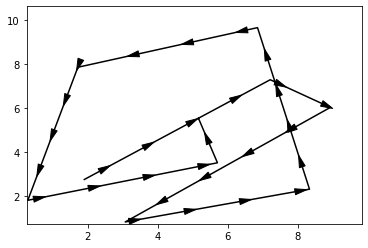

In [27]:
def arrowplot(axes, x, y, narrs=30, dspace=0.5, direc='pos', \
                          hl=0.3, hw=6, c='black'): 
    ''' narrs  :  Number of arrows that will be drawn along the curve

        dspace :  Shift the position of the arrows along the curve.
                  Should be between 0. and 1.

        direc  :  can be 'pos' or 'neg' to select direction of the arrows

        hl     :  length of the arrow head 

        hw     :  width of the arrow head        

        c      :  color of the edge and face of the arrow head  
    '''

    # r is the distance spanned between pairs of points
    r = [0]
    for i in range(1,len(x)):
        dx = x[i]-x[i-1] 
        dy = y[i]-y[i-1] 
        r.append(np.sqrt(dx*dx+dy*dy))
    r = np.array(r)

    # rtot is a cumulative sum of r, it's used to save time
    rtot = []
    for i in range(len(r)):
        rtot.append(r[0:i].sum())
    rtot.append(r.sum())

    # based on narrs set the arrow spacing
    aspace = r.sum() / narrs

    if direc is 'neg':
        dspace = -1.*abs(dspace) 
    else:
        dspace = abs(dspace)

    arrowData = [] # will hold tuples of x,y,theta for each arrow
    arrowPos = aspace*(dspace) # current point on walk along data
                                 # could set arrowPos to 0 if you want
                                 # an arrow at the beginning of the curve

    ndrawn = 0
    rcount = 1 
    while arrowPos < r.sum() and ndrawn < narrs:
        x1,x2 = x[rcount-1],x[rcount]
        y1,y2 = y[rcount-1],y[rcount]
        da = arrowPos-rtot[rcount]
        theta = np.arctan2((x2-x1),(y2-y1))
        ax = np.sin(theta)*da+x1
        ay = np.cos(theta)*da+y1
        arrowData.append((ax,ay,theta))
        ndrawn += 1
        arrowPos+=aspace
        while arrowPos > rtot[rcount+1]: 
            rcount+=1
            if arrowPos > rtot[-1]:
                break

    # could be done in above block if you want
    for ax,ay,theta in arrowData:
        # use aspace as a guide for size and length of things
        # scaling factors were chosen by experimenting a bit

        dx0 = np.sin(theta)*hl/2. + ax
        dy0 = np.cos(theta)*hl/2. + ay
        dx1 = -1.*np.sin(theta)*hl/2. + ax
        dy1 = -1.*np.cos(theta)*hl/2. + ay

        if direc is 'neg' :
          ax0 = dx0 
          ay0 = dy0
          ax1 = dx1
          ay1 = dy1 
        else:
          ax0 = dx1 
          ay0 = dy1
          ax1 = dx0
          ay1 = dy0 

        axes.annotate('', xy=(ax0, ay0), xycoords='data',
                xytext=(ax1, ay1), textcoords='data',
                arrowprops=dict( headwidth=hw, frac=1., ec=c, fc=c))


    axes.plot(x,y, color = c)
    axes.set_xlim(x.min()*.9,x.max()*1.1)
    axes.set_ylim(y.min()*.9,y.max()*1.1)


if __name__ == '__main__':
    fig = plt.figure()
    axes = fig.add_subplot(111)

    # my random data
    scale = 10 
    np.random.seed(101)
    x = np.random.random(10)*scale
    y = np.random.random(10)*scale
    arrowplot(axes, x, y ) 

    plt.show()

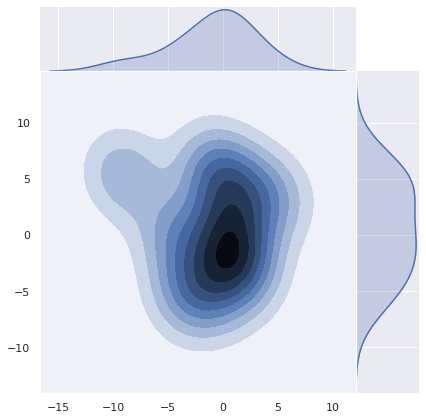

In [59]:
import seaborn as sns; sns.set()

w_fit = np.array([0.5, 0.5])
H_fit = np.array([12.01919428, 10.05648261])


z = np.random.multivariate_normal(mean=w_fit, cov=np.diag(H_fit), size=10)
y = np.transpose(z)
sns.jointplot(x=y[0],
              y=y[1], 
              kind="kde", 
              space=0);

In [115]:
import math
H_fit = np.array([1, 2, 3])
for i in range(3):
    stdev = 1.0 / math.sqrt(H_fit[i])
    print(stdev)

1.0
0.7071067811865475
0.5773502691896258


In [2]:
import numpy as np

x = np.array([0.001, 0.001, 0.001])

In [3]:
1 / x

array([1000., 1000., 1000.])

In [237]:
import pandas as pd
# res = pd.read_csv("log_progress.csv")
# res2 = pd.read_csv("log_progress2.csv")
# res3 = pd.read_csv("log_progess4.csv")
res5 = pd.read_csv("log_progess5.csv")
res6 =  pd.read_csv("log_progress_test.csv")
res7 =  pd.read_csv("log_progress_75.csv")

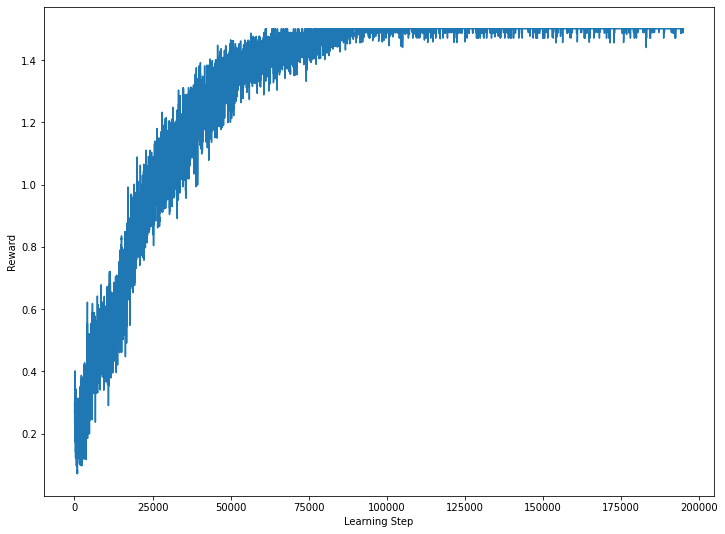

In [216]:
plt.figure(figsize=(12, 9))
plt.plot(res6.episode_reward.rolling(50).mean())
plt.ylabel("Reward")
plt.xlabel("Learning Step")
plt.savefig("figures/minecart_OK.png")

Text(0.5, 0, 'step')

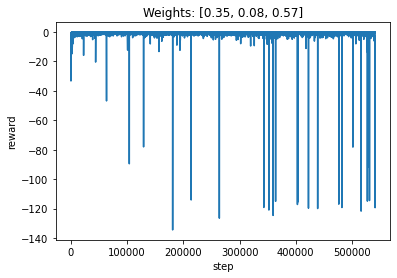

In [46]:
plt.plot(res2.episode_reward)
plt.title("Weights: [0.35, 0.08, 0.57]")
plt.ylabel("reward")
plt.xlabel("step")

Text(0.5, 0, 'step')

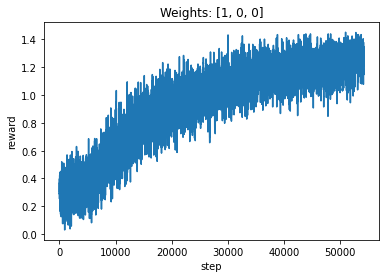

In [47]:
plt.plot(res.episode_reward.rolling(20).mean())
plt.title("Weights: [1, 0, 0]")
plt.ylabel("reward")
plt.xlabel("step")

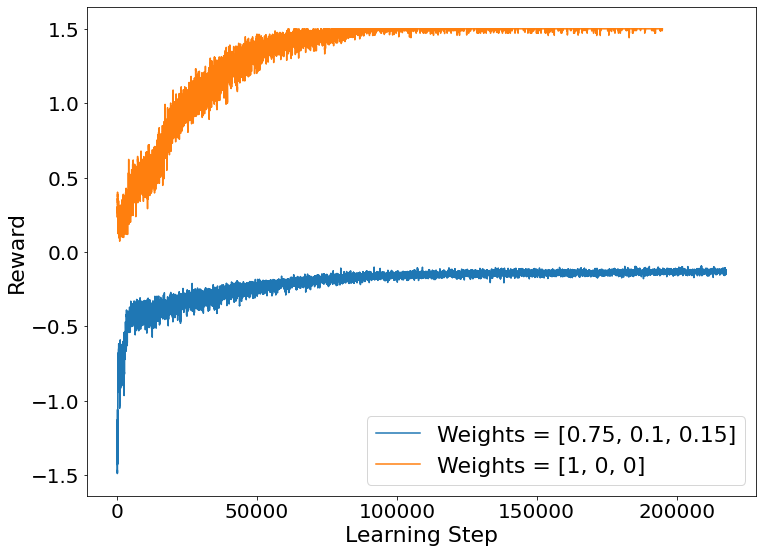

In [239]:
plt.figure(figsize=(12, 9))
plt.plot(res5.episode_reward.rolling(50).mean(), label="Weights = [0.75, 0.1, 0.15]")
plt.plot(res6.episode_reward.rolling(50).mean(), label="Weights = [1, 0, 0]")
plt.ylabel("Reward", fontsize=22)
plt.xlabel("Learning Step", fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=22)
plt.savefig("figures/minecart_FAIL.png")


In [7]:
import pickle
opt_sol, res = pickle.load(open(f'experiments/minecart_abs_1/logs_[0.8 0.  0.2].pickle', 'rb'))
print(res)

{'returns': [array([ 0.52982563,  0.        , -1.55334996]), array([ 0.        ,  0.        , -0.30733349]), array([ 0.        ,  0.        , -0.34296795]), array([ 0.        ,  0.        , -0.36711352])], 'weights': [array([0.75, 0.1 , 0.15]), array([0.1, 0.5, 0.4]), array([7.99999226e-01, 1.03497205e-06, 1.99999739e-01]), array([7.99999226e-01, 1.03497205e-06, 1.99999739e-01])]}


No handles with labels found to put in legend.
/home/benjamin/.local/lib/python3.6/site-packages/ternary/plotting.py:46: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks([], [])
/home/benjamin/.local/lib/python3.6/site-packages/ternary/plotting.py:48: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_yticks([], [])


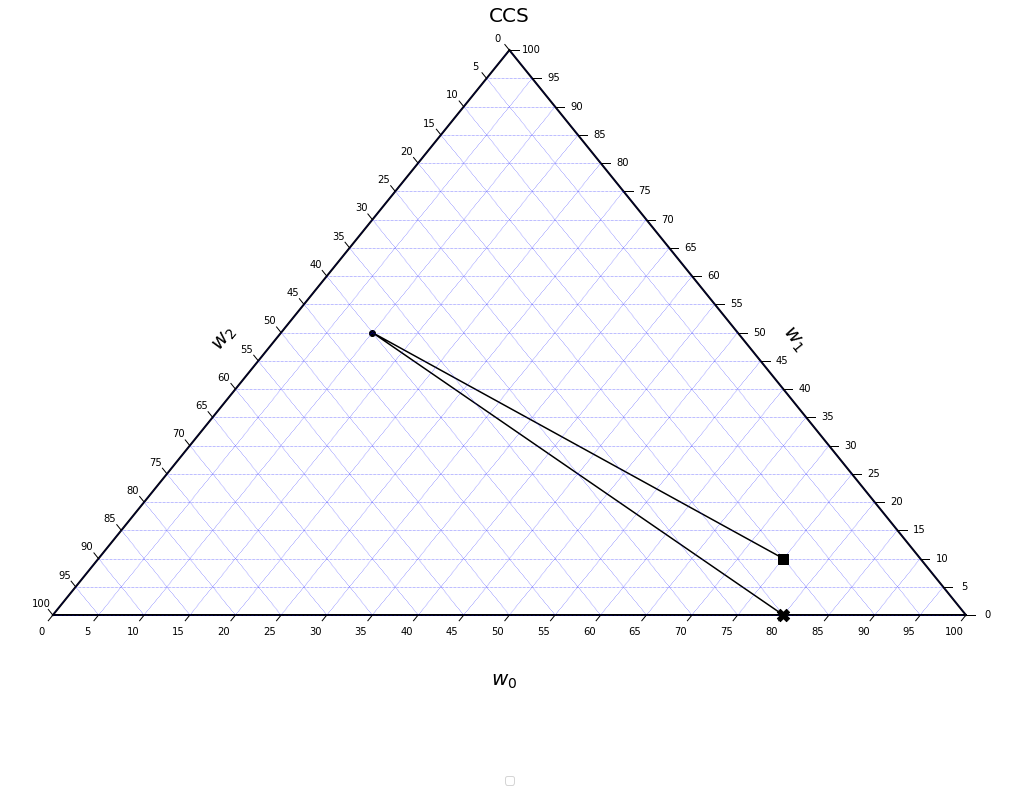

In [8]:
from src.utils import plot_on_ternary_map

plot_on_ternary_map(res, [0.8, 0,  0.2], "minecart")

In [14]:
import numpy as np
import math
h_vec = np.array([2, 3, 4])
for i in range(len(h_vec)):
    stdev = 1.0 / math.sqrt(h_vec[i])
    print(stdev)

0.7071067811865475
0.5773502691896258
0.5


In [16]:
1 / np.sqrt(h_vec)

array([0.70710678, 0.57735027, 0.5       ])

In [17]:
dominated = 1 if True else 2


In [57]:
dominated = [2, 4]
synthetic_p = [np.random.uniform(-1000,dominated[i]) for i in range(len(dominated))]
synthetic_p

[-667.2803081621067, -215.35628787970234]

In [61]:
import matplotlib.pyplot as plt



In [70]:
s_rates, means_iters, stds_iters = pickle.load(open(f'experiments/v_comp_2/results.pickle', 'rb'))

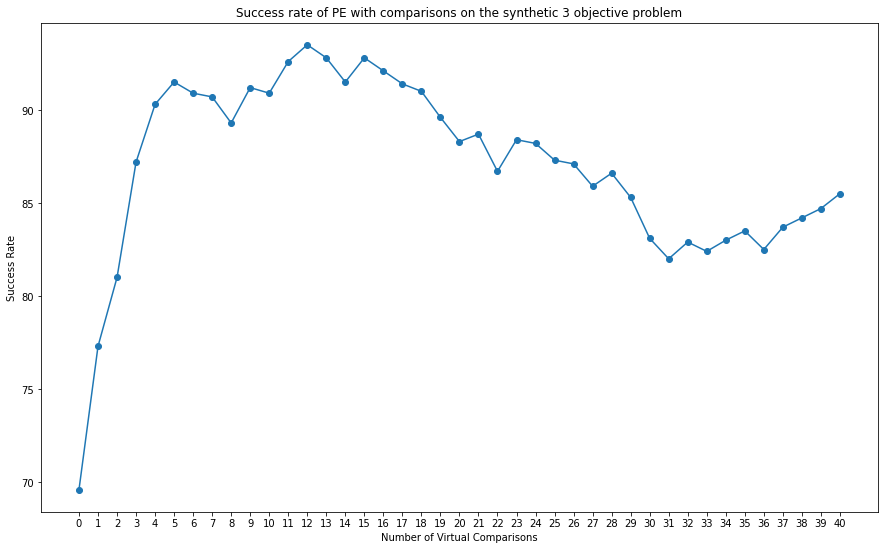

In [76]:
plt.figure(figsize=(15, 9))
plt.plot(s_rates,  marker='o')
plt.xticks(list(range(len(s_rates))))
plt.xlabel("Number of Virtual Comparisons")
plt.ylabel("Success Rate")
plt.title("Success rate of PE with comparisons on the synthetic 3 objective problem")
plt.savefig("1.png")

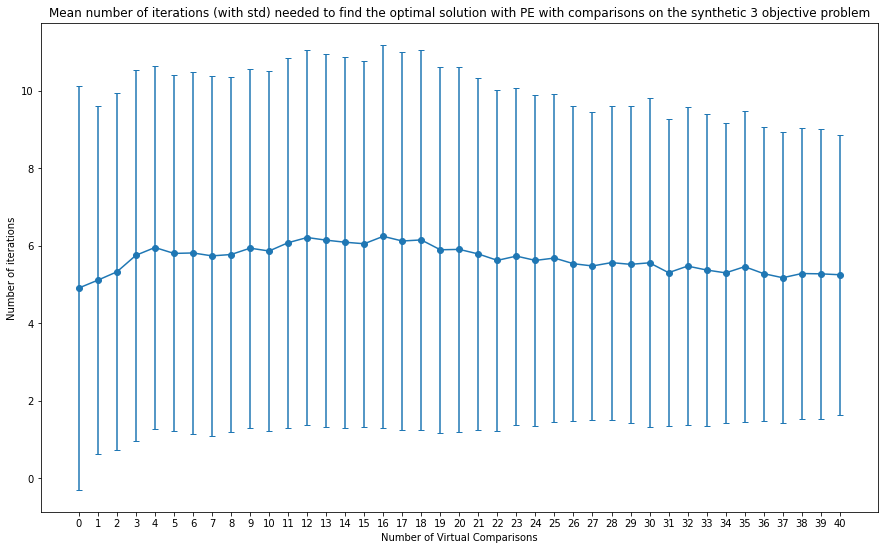

In [77]:

plt.figure(figsize=(15, 9))
plt.errorbar(list(range(len(means_iters))), means_iters, yerr=stds_iters, marker='o', capsize=3)
plt.xticks(list(range(len(means_iters))))
plt.xlabel("Number of Virtual Comparisons")
plt.ylabel("Number of iterations")
plt.title("Mean number of iterations (with std) needed to find the optimal solution with PE with comparisons on the synthetic 3 objective problem")
plt.savefig("2.png")

In [78]:
s_rates, means_iters, stds_iters = pickle.load(open(f'experiments/v_comp_bst_2/results.pickle', 'rb'))

In [81]:
print(s_rates[1])

63.6


In [84]:
0.4 * 4 + 0.6 * 10

7.6

In [80]:
import pickle
s_r, num_iters = pickle.load(open(f'experiments/synt_bst_n_iters_2/results.pickle', 'rb'))

In [81]:
print(s_r)

99.7


([], <a list of 0 Text major ticklabel objects>)

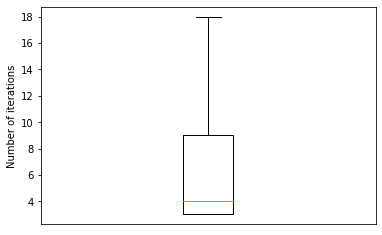

In [83]:
plt.boxplot(num_iters)
plt.ylabel("Number of iterations")
plt.xticks([])
# plt.title("Number of iterations needed by the the Preference Elicitiation with comparison algorithm to find the optimal solution")

In [104]:
s_r, num_iters = pickle.load(open(f'experiments/synt_n_iters_2/results.pickle', 'rb'))

([], <a list of 0 Text major ticklabel objects>)

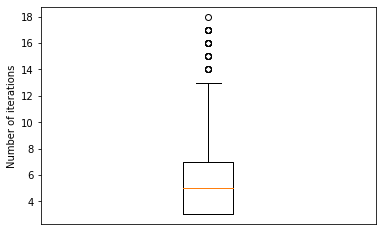

In [105]:
plt.boxplot(num_iters)
plt.ylabel("Number of iterations")
plt.xticks([])
# plt.title("Number of iterations needed by the the Preference Elicitiation with comparison algorithm to find the optimal solution")

In [102]:
print(s_r)

93.0


(array([285., 115., 142.,  25.,  40.,  10.,  12.,   5.,  11.,   7.]),
 array([ 3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. , 16.5, 18. ]),
 <a list of 10 Patch objects>)

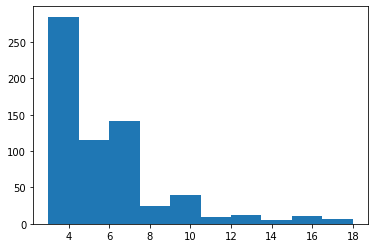

In [106]:
# print(np.mean(num_iters))
plt.hist(num_iters)

In [92]:
above_ols = [e for e in num_iters if e > 16]
len(above_ols)

176

In [93]:
len(num_iters)

930

In [94]:
len(above_ols) + 70

246

In [127]:
s_r, num_iters = pickle.load(open(f'experiments/synt_bst_n_iters_5/results.pickle', 'rb'))

In [128]:
print(s_r)
print(len(num_iters))

99.7
997


In [129]:
[i for i in range(0,45,5)]

[0, 5, 10, 15, 20, 25, 30, 35, 40]

# Results

##  With Utility Returns

In [ ]:
#  python3.7 -m src.experiments --eid eval_noise_synt --experiment noise --env synt --method absolute

### 2 Objs

In [280]:
res = pickle.load(open(f'experiments/eval_noise_bst_3/noise_[0.23, 0.77].pickle', 'rb'))

In [290]:
dist_ut, dist_w = res
# print(dist_ut)
last_dist_ut = [dist_ut[i][-1] for i in range(len(dist_ut))]
last_dist_w = [dist_w[i][-1] for i in range(len(dist_w))]

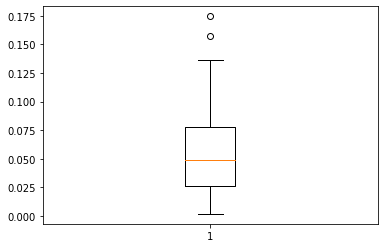

In [293]:
plt.boxplot(last_dist_w);

### 3 Obj

## With Comparisons

In [298]:
import pandas as pd
import seaborn as sns

def plot_eval_comp_res(res):

    # n_virt_comp: res[n_iter][n_virt_comp] for n_virt_comp in range(0, 45, 5)
    Index= [
        3,
        6,
        9,
        12,
        15
    ]
    data = {n_virt_comp: [res[n_iter][n_virt_comp] for n_iter in res] for n_virt_comp in range(0, 45, 5)}
    data["Solver calls budget"] = list(res.keys())
    df = pd.DataFrame.from_dict(data)
    df = df.set_index("Solver calls budget")
    df = df.iloc[::-1]


    sns.heatmap(df, annot=True, cmap="Greens")
    plt.xlabel("Number of virtual comparisons")

### 2 Obj

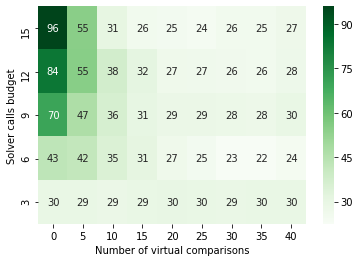

In [203]:
# python3.7 -m src.experiments --eid eval_bst --experiment eval_comps --env synt_bst
res = pickle.load(open(f'experiments/eval_bst/results.pickle', 'rb'))
plot_eval_comp_res(res)

40


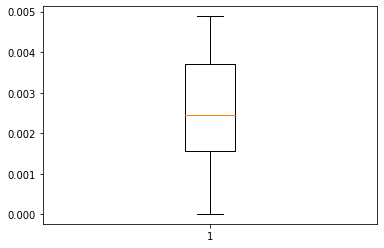

In [279]:
res = pickle.load(open(f'experiments/eval_distances_synt_bst/results.pickle', 'rb'))
lasts = [res[i][-1] for i in range(len(res))]
lasts_without_zero = [x for x in lasts if x != 0]
print(len(lasts_without_zero))
plt.boxplot(lasts_without_zero);

### 3 Obj

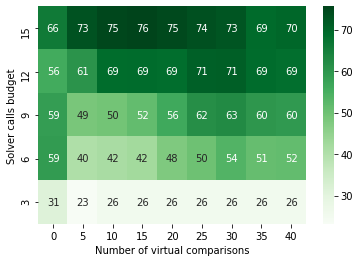

In [204]:
# python3.7 -m src.experiments --eid eval_synt --experiment eval_comps --env synt
res = pickle.load(open(f'experiments/eval_synt/results.pickle', 'rb'))
plot_eval_comp_res(res)

249


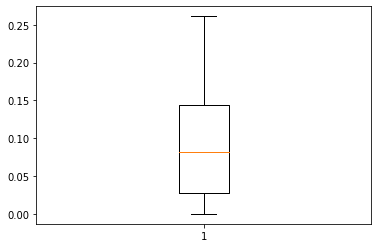

In [278]:
res = pickle.load(open(f'experiments/eval_distances_synt/results.pickle', 'rb'))
lasts = [res[i][-1] for i in range(len(res))]
lasts_without_zero = [x for x in lasts if x != 0]
# print(lasts_without_zero)
print(len(lasts_without_zero))
plt.boxplot(lasts_without_zero);

In [297]:
# python3.7 -m src.experiments --eid eval_bst --experiment eval_comps --env synt_bst
res = pickle.load(open(f'experiments/eval_bst_2/results.pickle', 'rb'))
plot_eval_comp_res(res)

{3: {0: 29.799999999999997,
  5: 28.599999999999998,
  10: 28.1,
  15: 28.1,
  20: 28.1,
  25: 28.1,
  30: 28.1,
  35: 28.1,
  40: 28.1},
 6: {0: 43.1,
  5: 34.300000000000004,
  10: 21.6,
  15: 18.099999999999998,
  20: 15.4,
  25: 14.899999999999999}}

In [313]:
res = pickle.load(open(f'experiments/success_comp_1_bst/results.pickle', 'rb'))

In [332]:
dists = [res[key][1] for key in res.keys()]
# dists = [e[-1] for e in dists]
print(len(dists[0]))

100


In [322]:
x = list(res.keys())
y = [res[key][1][-1] for key in x]

In [321]:
np.corrcoef(x, y)

array([[1.        , 0.88507889],
       [0.88507889, 1.        ]])

In [333]:
noise_value = 2
print(f"{noise_value}%")

2%


In [24]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import stats
matplotlib.rcParams.update({'font.size': 22})


In [686]:
def plot_success(res, env_name,  metric="s_calls"):
        
    if env_name == "synt":
        res_abs_low_noise = pickle.load(open(f'experiments/abs_low_noise_synt/results.pickle', 'rb'))
    else:
        res_abs_low_noise = pickle.load(open(f'experiments/abs_low_noise_synt_bst/results.pickle', 'rb'))
            
    plt.figure(figsize=(18, 8))
    x = sorted(list(res.keys()))#[:14]
    y_comps = [res[key]["comp"]["success"] for key in x]#[:14]
    y_abs = [res[key]["abs"]["success"] for key in x]#[:14]
#     y_abs_low_noise =  [res_abs_low_noise[key]["abs"]["success"] for key in x]#[:14]
    plt.plot(x, y_abs, marker="o",label="Absolute Feedback (10% noise)")
#     plt.plot(x, y_abs_low_noise, marker="o",label="Absolute Feedback (0.1% noise)")
    plt.plot(x, y_comps, marker="o",label="Relative Feedback (0.1% noise)")
    if metric == "s_calls":
        plt.xlabel("Number of solver calls")
    else:
        plt.xlabel("Number of Queries")
        
    plt.ylabel("Succes Rate (in %)")
    plt.xticks(x)
    plt.legend()
    plt.savefig(f"figures/{env_name}_success_{metric}")

In [25]:
def plot_dist(res, env_name, metric="s_calls"):
    ci = 2.58
    
    if env_name == "synt":
        res_abs_low_noise = pickle.load(open(f'experiments/abs_low_noise_synt/results.pickle', 'rb'))
    else:
        res_abs_low_noise = pickle.load(open(f'experiments/abs_low_noise_synt_bst/results.pickle', 'rb'))
        
    x = sorted(list(res.keys()))[:14]
    
    mean_dists_abs  = [np.mean(res[key]["abs"]["distance"]) for key in x]#[:14]
    std_dists_abs  = [np.std(res[key]["abs"]["distance"]) for key in x]#[:14]
    ci_95_abs = [ci*stats.sem(res[key]["abs"]["distance"]) for key in x]
    
    mean_dists_abs_low_noise  = [np.mean(res_abs_low_noise[key]["abs"]["distance"]) for key in x]#[:14]
    std_dists_abs_low_noise  = [np.std(res_abs_low_noise[key]["abs"]["distance"]) for key in x]#[:14]
    ci_95_ab_low_noises = [ci*stats.sem(res_abs_low_noise[key]["abs"]["distance"]) for key in x]
    
    mean_dists_comp  = [np.mean(res[key]["comp"]["distance"]) for key in x]#[:14]
    std_dists_comp  = [np.std(res[key]["comp"]["distance"]) for key in x]#[:14]
    ci_95_comp = [ci*stats.sem(res[key]["comp"]["distance"]) for key in x]
    
    
    plt.figure(figsize=(15, 9))

    plt.errorbar(x, mean_dists_abs, yerr=ci_95_abs, marker="o", capsize=4, label="Absolute Feedback (10% noise)")
    plt.errorbar(x, mean_dists_abs_low_noise, yerr=std_dists_abs_low_noise, marker="o", capsize=4, label="Absolute Feedback (0.1 % noise)")
    plt.errorbar(x, mean_dists_comp, yerr=ci_95_comp, marker="o", capsize=4, label="Relative Feedback (0.1 % noise)")
    if metric == "s_calls":
        plt.xlabel("Number of solver calls")
    else:
        plt.xlabel("Number of Queries")
    plt.ylabel("Utility Loss")
    plt.xticks(x)
    plt.legend()
    plt.savefig(f"figures/{env_name}_dist_{metric}")

In [702]:
def plot_dist2(res1, res2):
    ci = 2.58
    
    x = sorted(list(res2.keys()))#[:14]
    
#     mean_dists_r1  = [np.mean(res1[key]["comp"]["distance"]) for key in x]#[:14]
#     ci_95_r1 = [ci*stats.sem(res1[key]["comp"]["distance"]) for key in x]
    
    mean_dists_r2  = [np.mean(res2[key]["comp"]["distance"]) for key in x]#[:14]
    ci_95_r2 = [ci*stats.sem(res2[key]["comp"]["distance"]) for key in x]
    
    plt.figure(figsize=(16, 8))

#     plt.errorbar(x, mean_dists_r1, yerr=ci_95_r1, marker="o", capsize=4, label="CCS size = 10")
    plt.errorbar(x, mean_dists_r2, yerr=ci_95_r2, marker="o", capsize=4)
    plt.xlabel("Number of solver calls")
    plt.hlines(y=0.05, xmin=0, xmax=41, linestyles="dotted")
    plt.text(x[-1], 0.05, 'Utilty Loss = 0.05', ha='right', va='center')

    plt.ylabel("Utility Loss")
    plt.xticks(x[0::2])
    plt.legend()
    plt.savefig(f"figures/dist_10v20")

##  Deep Sea Treasure

### S_CALLS

In [610]:
res = pickle.load(open(f'experiments/comp_synt_bst_4/results.pickle', 'rb'))
# res = pickle.load(open(f'experiments/comp_synt_bst_solver_last/results.pickle', 'rb'))
# res = pickle.load(open(f'experiments/comp_synt_bst_solver_ok/results.pickle', 'rb'))
np.mean([x for x in res[5]["abs"]["distance"] if x !=0])
# np.std(res[5]["abs"]["distance"])
len([x for x in res[5]["abs"]["distance"] if x !=0])

27

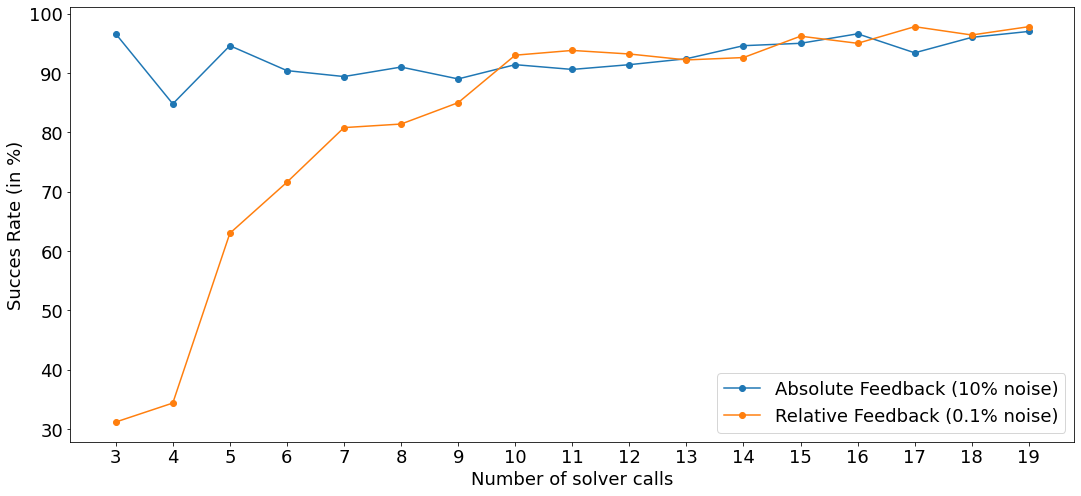

In [606]:
plot_success(res, "dst")

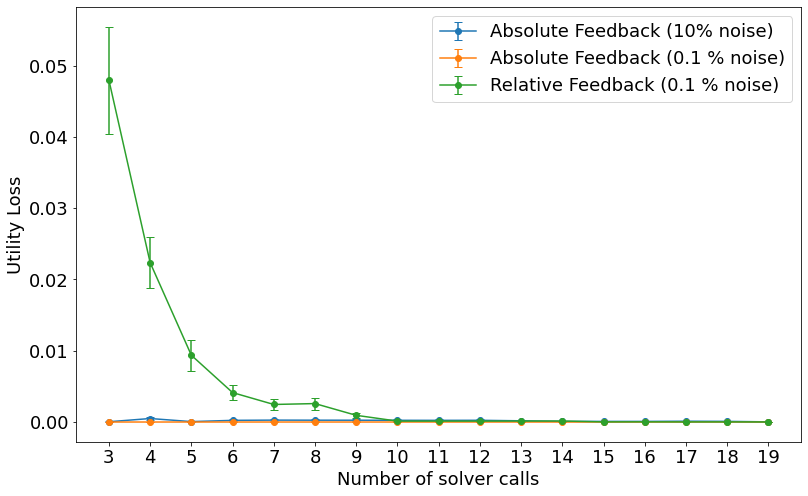

In [631]:
plot_dist(res, "dst")

### QUERIES

In [633]:
res = pickle.load(open(f'experiments/comp_synt_bst_query/results.pickle', 'rb'))

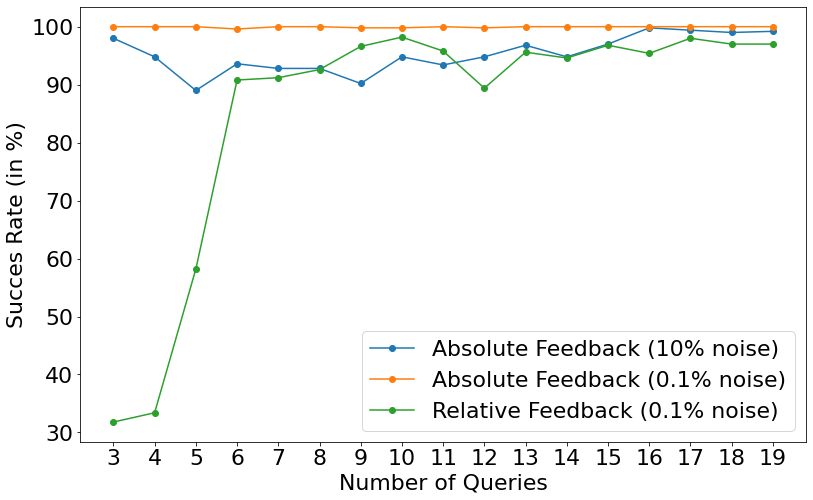

In [317]:
plot_success(res, "dst", "query")

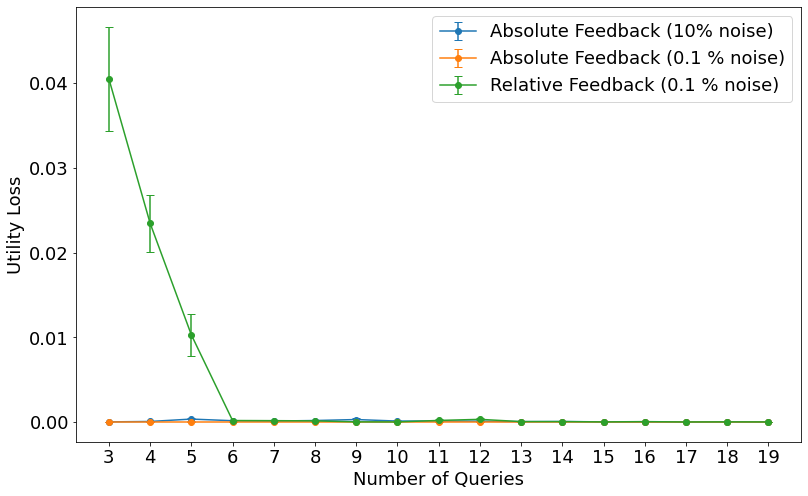

In [634]:
plot_dist(res, "dst", "query")

## Synthetic CCS

### S_CALLS

In [19]:
import pickle
res = pickle.load(open(f'experiments/comp_synt_5/results.pickle', 'rb'))
# res = pickle.load(open(f'experiments/comp_synt_solver_ok/results.pickle', 'rb'))

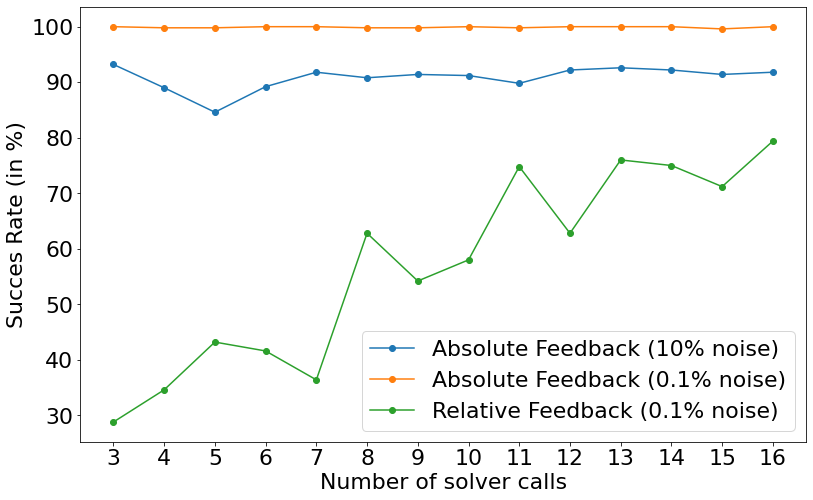

In [508]:
plot_success(res, "synt")

In [639]:
np.mean(res[13]["comp"]["distance"])

0.02254302225530334

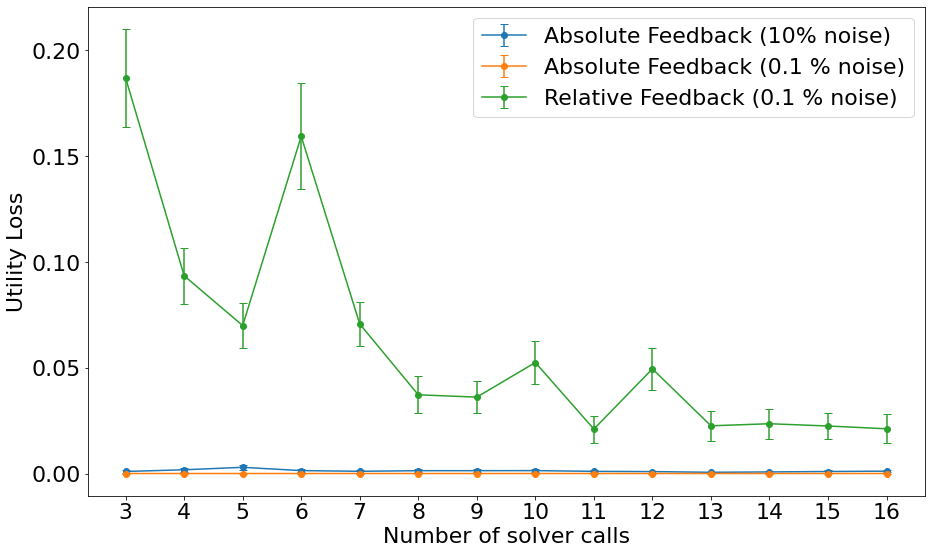

In [26]:
plot_dist(res, "synt")

### QUERIES

In [640]:
res = pickle.load(open(f'experiments/comp_synt_query/results.pickle', 'rb'))

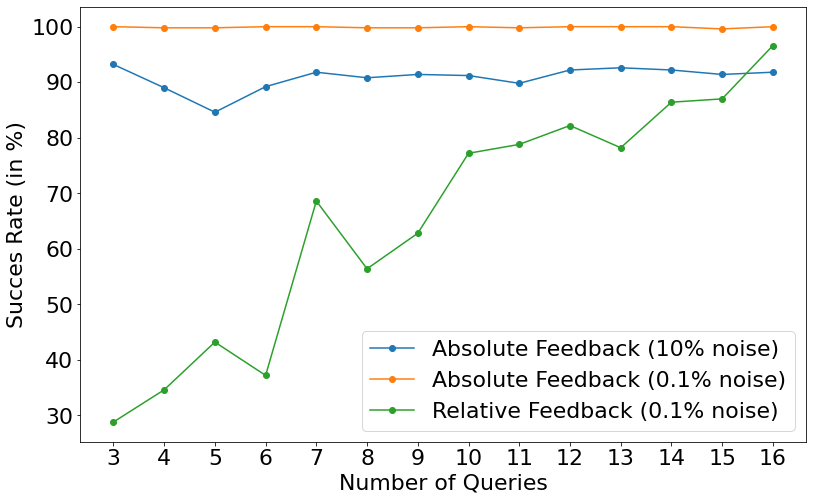

In [511]:
plot_success(res, "synt", "query")

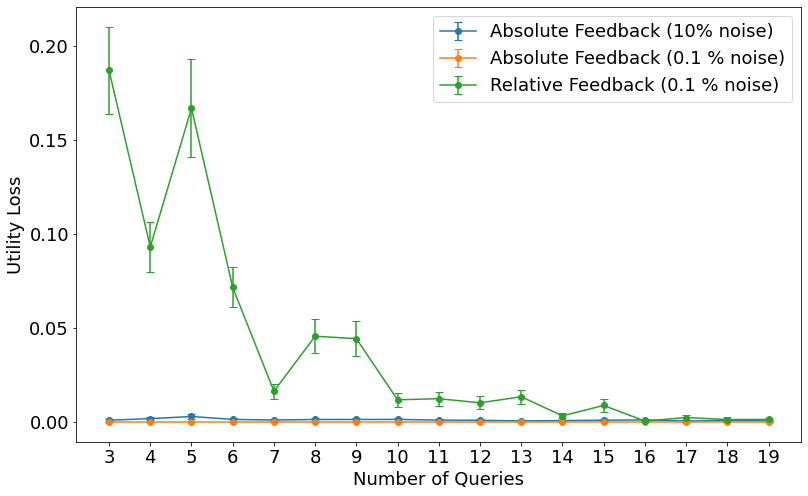

In [641]:
plot_dist(res, "synt", "query")

## NOISE

In [427]:
def plot_noise(res):
    f, axes = plt.subplots(ncols=2, nrows=1, figsize=(25, 10))
#     [0,5,10,20,40,60,80,100]
    for noise in [0,10,20,40,80,100]:
        dists = res[noise]["dist"]
        w = res[noise]["w"]
        
        mean_dists = np.array(res[noise]["dist"]).mean(axis=0)
        std_dists = np.array(res[noise]["dist"]).std(axis=0)
        
        mean_w = np.array(res[noise]["w"]).mean(axis=0)
        std_w = np.array(res[noise]["w"]).std(axis=0)
        x = list(range(len(mean_dists)))
        axes[0].errorbar(x, mean_dists, yerr=std_dists, capsize=4, label=f"{noise}%")
        
#         axes[0].plot(x, mean_dists, label=f"{noise}%")
#         axes[0].fill_between(x, (mean_dists-std_dists), (mean_dists+std_dists), alpha=.2)

        axes[1].errorbar(x, mean_w, yerr=std_w, capsize=4, label=f"{noise}%")
        
    axes[0].set_xlabel("Iteration")
    axes[1].set_xlabel("Iteration")
    
    axes[0].set_ylabel("Utility Loss")
    axes[1].set_ylabel("$| w^* - w |$")
    

    axes[0].legend()
    axes[1].legend()    
#     axes[0].set_xticks(np.arange(len(x)), np.arange(1, len(x)+1))


    axes[0].set_xticks(x)
    axes[1].set_xticks(x)    

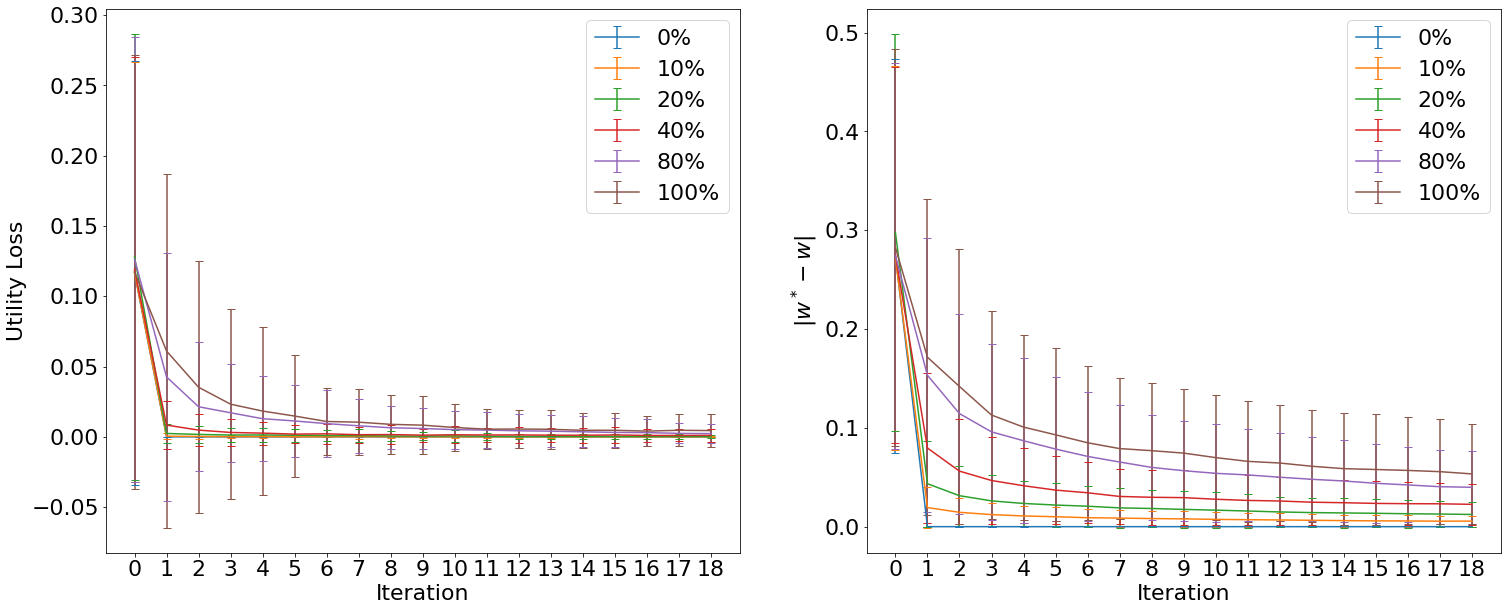

In [428]:
res = pickle.load(open(f'experiments/eval_noise_synt_bst_new/results.pickle', 'rb'))
plot_noise(res)
plt.savefig("figures/noise_bst")

In [433]:
len([x for x in res[0]["dist"] if x == 0)

0

In [453]:
(len([x[2] for x in res[10]["dist"] if x[1] == 0]) / 500) * 100

88.0

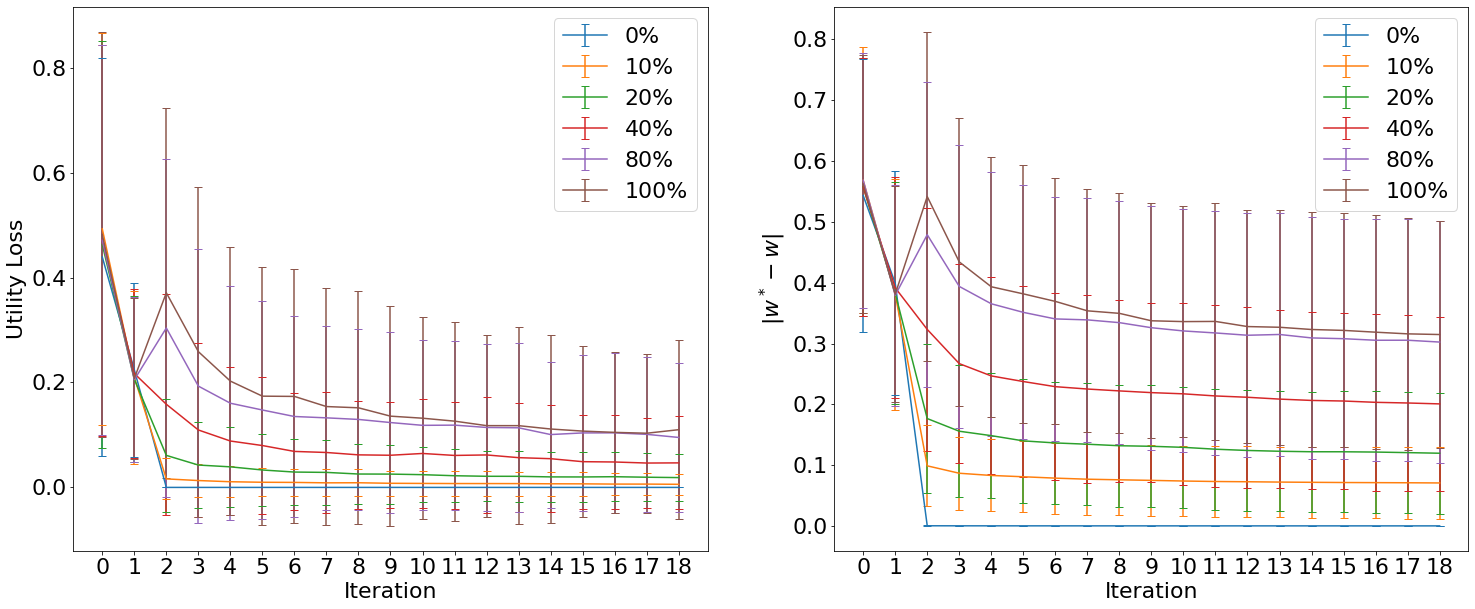

In [420]:
res = pickle.load(open(f'experiments/eval_noise_synt_new/results.pickle', 'rb'))
plot_noise(res)
plt.savefig("figures/noise_synt")

In [456]:
# [0.134646 0.865354]

# [35.29396694 -7.39501181]  -1.6471115693976572

np.dot([0.134646, 0.865354], [35.29396694,-7.39501181] )
np.dot([35.29396694,-7.39501181], [0.134646, 0.865354])

-1.6471115772275002

In [457]:
np.dot([0.134646, 0.865354], [32.344,-5.298] )


-0.22965526800000013

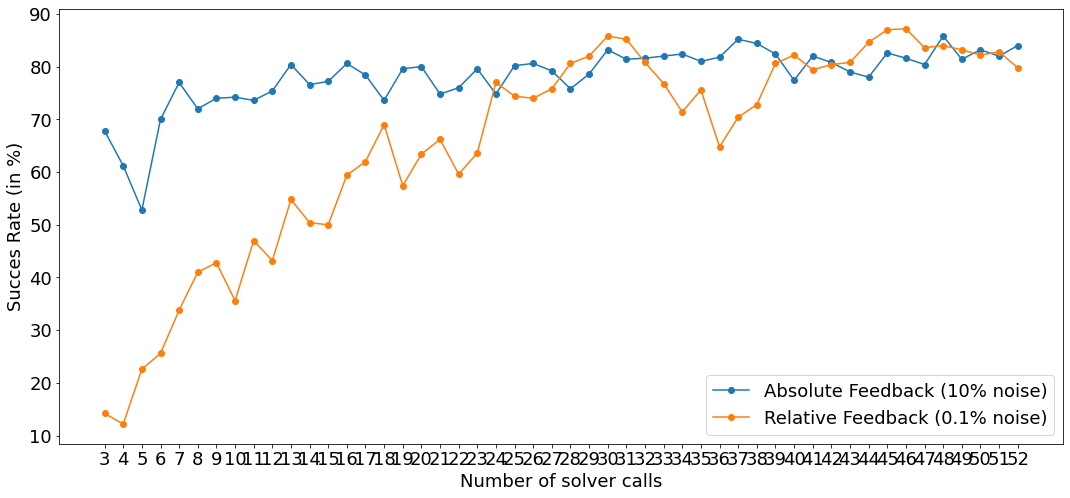

In [575]:
res = pickle.load(open(f'experiments/comp_synt_20_solver/results.pickle', 'rb'))
plot_dist(res, "synt")

No handles with labels found to put in legend.


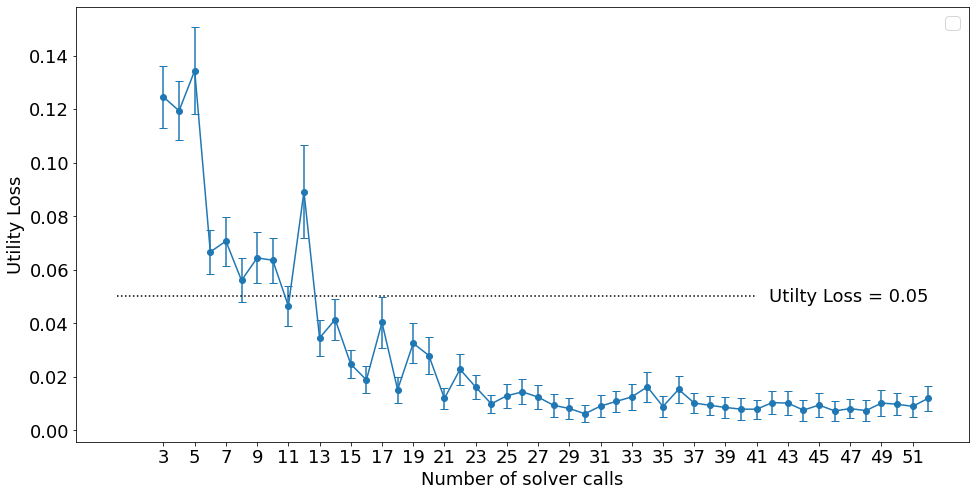

In [703]:
res = pickle.load(open(f'experiments/comp_synt_5/results.pickle', 'rb'))
res2 = pickle.load(open(f'experiments/comp_synt_20_solver/results.pickle', 'rb'))
plot_dist2(res, res2)

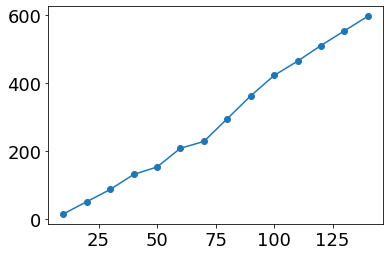

In [679]:
sizes = [
    10,
    20,
    30,
    40,
    50,
    60,
    70,
    80,
    90,
    100,
    110,
    120,
    130,
    140,
]

ols_iters = [
    16,
    52,
    88,
    132,
    154,
    209,
    229,
    296,
    363,
    423,
    465,
    511,
    554,
    597,
    
]


plt.plot(sizes, ols_iters, marker="o")

In [705]:
GAMMA_BST = 0.95
sum([-1 * GAMMA_BST**i for i in range(2)])

-1.95

In [707]:
26 * GAMMA_BST**2, sum([-1 * GAMMA_BST**i for i in range(3)])

(23.465, -2.8525)

In [737]:
r = pickle.load(open(f'experiments/bst/results_linspace.pickle', 'rb'))

In [738]:
print(len(r))
for k in r:
    if list(r[k]["opt"]) != list(r[k]["ret"]):
        print(r[k]["w"])

100


In [32]:
!ls -lt traces_last/

total 10392
drwxrwxr-x 2 benjamin benjamin     4096 juin  29 10:39 'A2C_4f67_[0.75 0.1  0.15]_003_0'
drwxrwxr-x 2 benjamin benjamin     4096 juin  29 10:39 'A2C_6455_[0.75 0.1  0.15]_004_0'
drwxrwxr-x 2 benjamin benjamin     4096 juin  27 20:43 'A2C_1981_[1. 0. 0.]_0015_0'
drwxrwxr-x 2 benjamin benjamin     4096 juin  27 20:42 'A2C_27ac_[0.75 0.1  0.15]_002_0'
drwxrwxr-x 2 benjamin benjamin     4096 juin  27 20:41 'A2C_d1ba_[0.75 0.1  0.15]_001_0'
drwxrwxr-x 2 benjamin benjamin     4096 juin  27 20:40 'A2C_a5df_[0.75 0.1  0.15]_005_0'
drwxrwxr-x 2 benjamin benjamin     4096 juin  27 20:38 'A2C_6149_[0.75 0.1  0.15]_008_0'
drwxrwxr-x 2 benjamin benjamin     4096 juin  27 20:37 'A2C_619f_[0.75 0.1  0.15]_01_0'
drwxrwxr-x 2 benjamin benjamin     4096 juin  23 13:51 'A2C_c3fd_[1. 0. 0.]_0015_0'
drwxrwxr-x 2 benjamin benjamin     4096 juin  23 13:50 'A2C_4ad5_[0.75 0.1  0.15]_0015_0'
drwxrwxr-x 2 benjamin benjamin     4096 juin  21 12:06 'A2C_6dde_[0.75 0.1  0.15]_005_0'
drwxrwxr-x 2 benjam

Text(0.5, 0, 'Learning Step')

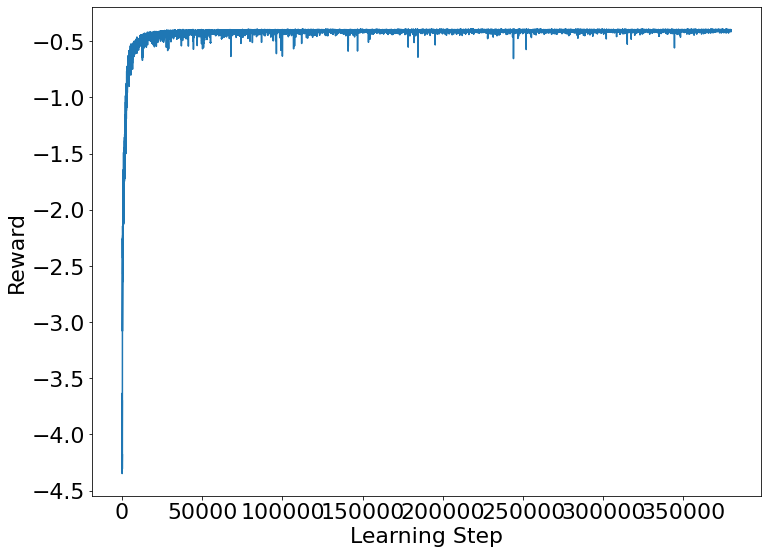

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
res =  pd.read_csv("traces_last/A2C_6455_[0.75 0.1  0.15]_004_0/log_progress.csv")
plt.figure(figsize=(12, 9))
plt.plot(res.episode_reward.rolling(50).mean())
plt.ylabel("Reward")
plt.xlabel("Learning Step")
# plt.savefig("figures/minecart_OK.png")